<a href="https://colab.research.google.com/github/Daichi0517/gasyori/blob/main/FILES/image020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

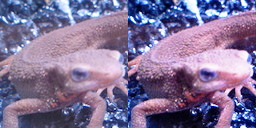

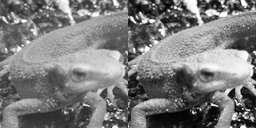

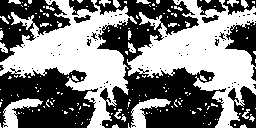

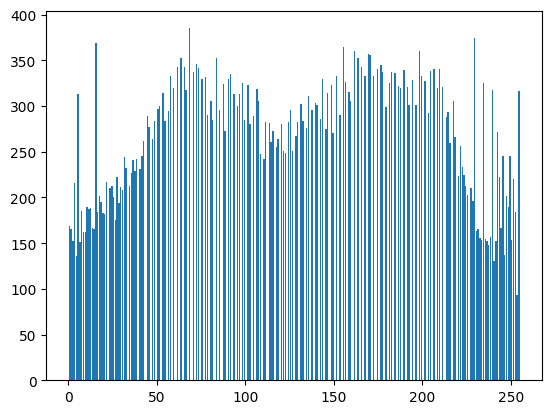

In [19]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
#画像の読み取り
img = cv2.imread('imori.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,img_otsu = cv2.threshold(img_gray,0,255,cv2.THRESH_OTSU)
def hist_equal(img, z_max=255):
   #画像の高さ、幅、色を取得
   h,w,c = img.shape
   s = h*w*c*1.
   out=img.copy()

   sum_h = 0

   for i in range(256):
    ind = np.where(img==i)
    sum_h += len(img[ind])
    z_prime = z_max / s * sum_h
    out[ind] = z_prime

   return out

out = hist_equal(img)
out_gray = cv2.cvtColor(out,cv2.COLOR_BGR2GRAY)
"""title_list = ['original color','original gray','equal color','equal gray']
img_list = [img,img_gray,out,out_gray]
fig = plt.figure(figsize=(10,4))
for i,(title,img) in enumerate(zip(title_list,img_list)):
  ax = fig.add_subplot(2,2,i+1)
  ax.title.set_text(title)
plt.show()"""
ret,out_otsu = cv2.threshold(out_gray,0,255,cv2.THRESH_OTSU)
color = cv2.hconcat([img,out])
gray = cv2.hconcat([img_gray,out_gray])
otsu = cv2.hconcat([img_otsu,out_otsu])
cv2_imshow(color)
cv2_imshow(gray)
cv2_imshow(otsu)
# ヒストグラムを出力
plt.hist(out.ravel(),bins=255,rwidth=0.8,range=(0,255));  # ; をつけることで返り値の表示をなくすことができる